In [1]:
import pandas as pd
import numpy as np

In [2]:
df_pathway_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# df_pathway_att = pd.read_csv('../../data/TransMCA_Pathway_Attention_lung_CellBlind_GEP_V2.csv')

# df_pathway_att = df_pathway_att[df_pathway_att['cell_line'].isin(['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1'])]
# 重置索引
# df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)
df_pathway_att.head()

(12630, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,5-Fluorouracil,OPM2,PCM,0.001386,0.001516,0.001544,0.001764,0.001685,0.001634,0.001773,...,0.001542,0.001352,0.001542,0.001405,0.001408,0.001708,0.002633,0.001840,0.001685,0.001541
1,5-azacytidine,OPM2,PCM,0.001537,0.001651,0.001543,0.001677,0.001742,0.001588,0.001569,...,0.001544,0.001334,0.001352,0.001402,0.001405,0.001742,0.002479,0.001702,0.002028,0.001539
2,A-366,OPM2,PCM,0.001513,0.001648,0.001529,0.001405,0.001395,0.001593,0.001573,...,0.001530,0.001300,0.001519,0.001397,0.001572,0.001718,0.002541,0.001649,0.002129,0.001347
3,ABT737,OPM2,PCM,0.001365,0.001471,0.001543,0.001316,0.001746,0.001747,0.001416,...,0.001365,0.001459,0.001541,0.001586,0.001586,0.001406,0.002330,0.001366,0.002299,0.001535
4,AGI-5198,OPM2,PCM,0.001358,0.001446,0.001532,0.001425,0.001736,0.001576,0.001592,...,0.001532,0.001436,0.001513,0.001399,0.001401,0.001737,0.002400,0.001265,0.002555,0.001530


In [3]:
# 根据OncotreeCode统计每种癌症的数量
df_pathway_att['OncotreeCode'].value_counts()

OncotreeCode
LUAD     1099
SCLC      811
UCEC      652
PAAD      651
HCC       651
LCLC      436
GB        434
PCM       433
LUSC      432
BLCA      432
AMOL      393
ESCC      369
TLL       369
HGSOC     362
NSCLC     360
COAD      219
BLL       218
VMM       218
PRCC      218
STSC      218
HL        218
PRAD      217
BL        217
ECAD      217
ESCA      217
HNSC      217
MBN       217
ATLL      216
MBL       216
CCOV      216
MEL       216
RCC       216
PANET     212
OCSC      180
SKCM      180
ODG       179
NBL       153
SOC       151
Name: count, dtype: int64

In [4]:
# 将df_pathway_att的第一列去除
df_pathway_att = df_pathway_att.iloc[:, 1:]
# 将df_pathway_att根据cell_line和OncotreeCode分组，再计算每组均值
df_pathway_att = df_pathway_att.groupby(['cell_line','OncotreeCode']).mean().reset_index()
print(df_pathway_att.shape)
df_pathway_att.head(100)

(61, 621)


,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_JNK_SIGNALING_PATHWAY,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,5637,BLCA,0.001383,0.001562,0.001529,0.001645,0.001658,0.001613,0.001534,0.001274,...,0.001523,0.001353,0.001455,0.001491,0.001440,0.001618,0.002512,0.001372,0.002508,0.001529
1,A172,GB,0.001386,0.001576,0.001527,0.001697,0.001654,0.001615,0.001533,0.001278,...,0.001523,0.001393,0.001475,0.001493,0.001441,0.001619,0.002521,0.001363,0.002495,0.001525
2,ACHN,PRCC,0.001385,0.001555,0.001530,0.001673,0.001658,0.001611,0.001532,0.001298,...,0.001524,0.001422,0.001496,0.001491,0.001441,0.001624,0.002519,0.001362,0.002478,0.001514
3,ALLSIL,TLL,0.001379,0.001563,0.001524,0.001638,0.001644,0.001613,0.001532,0.001275,...,0.001519,0.001334,0.001399,0.001490,0.001438,0.001618,0.002496,0.001388,0.002451,0.001523
4,CAL29,BLCA,0.001387,0.001571,0.001528,0.001458,0.001651,0.001609,0.001542,0.001312,...,0.001525,0.001365,0.001488,0.001501,0.001445,0.001622,0.002521,0.001361,0.002504,0.001512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,SIGM5,AMOL,0.001374,0.001561,0.001525,0.001604,0.001652,0.001620,0.001527,0.001272,...,0.001520,0.001372,0.001487,0.001490,0.001439,0.001615,0.002468,0.001364,0.002485,0.001508
57,SKHEP1,HCC,0.001386,0.001585,0.001527,0.001524,0.001660,0.001619,0.001533,0.001276,...,0.001526,0.001340,0.001493,0.001489,0.001439,0.001627,0.002529,0.001352,0.002505,0.001521
58,SKNSH,NBL,0.001379,0.001584,0.001524,0.001651,0.001650,0.001612,0.001523,0.001296,...,0.001520,0.001339,0.001442,0.001493,0.001442,0.001603,0.002516,0.001379,0.002462,0.001528
59,SNU398,HCC,0.001383,0.001562,0.001523,0.001473,0.001648,0.001614,0.001534,0.001281,...,0.001520,0.001343,0.001481,0.001490,0.001440,0.001608,0.002499,0.001431,0.002437,0.001521


In [5]:
# 将cell_line列作为index
df_pathway_att = df_pathway_att.set_index('OncotreeCode')

In [6]:
attention_scores = df_pathway_att.iloc[:, 1:]
attention_scores.head(100)

,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_JNK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_KEAP1_NRF2_SIGNALIG_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_NFKB_SIGNALING_PATHWAY,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
OncotreeCode,,,,,,,,,,,,,,,,,,,,,
BLCA,0.001383,0.001562,0.001529,0.001645,0.001658,0.001613,0.001534,0.001274,0.001440,0.001488,...,0.001523,0.001353,0.001455,0.001491,0.001440,0.001618,0.002512,0.001372,0.002508,0.001529
GB,0.001386,0.001576,0.001527,0.001697,0.001654,0.001615,0.001533,0.001278,0.001508,0.001481,...,0.001523,0.001393,0.001475,0.001493,0.001441,0.001619,0.002521,0.001363,0.002495,0.001525
PRCC,0.001385,0.001555,0.001530,0.001673,0.001658,0.001611,0.001532,0.001298,0.001436,0.001487,...,0.001524,0.001422,0.001496,0.001491,0.001441,0.001624,0.002519,0.001362,0.002478,0.001514
TLL,0.001379,0.001563,0.001524,0.001638,0.001644,0.001613,0.001532,0.001275,0.001492,0.001469,...,0.001519,0.001334,0.001399,0.001490,0.001438,0.001618,0.002496,0.001388,0.002451,0.001523
BLCA,0.001387,0.001571,0.001528,0.001458,0.001651,0.001609,0.001542,0.001312,0.001431,0.001486,...,0.001525,0.001365,0.001488,0.001501,0.001445,0.001622,0.002521,0.001361,0.002504,0.001512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMOL,0.001374,0.001561,0.001525,0.001604,0.001652,0.001620,0.001527,0.001272,0.001477,0.001463,...,0.001520,0.001372,0.001487,0.001490,0.001439,0.001615,0.002468,0.001364,0.002485,0.001508
HCC,0.001386,0.001585,0.001527,0.001524,0.001660,0.001619,0.001533,0.001276,0.001521,0.001483,...,0.001526,0.001340,0.001493,0.001489,0.001439,0.001627,0.002529,0.001352,0.002505,0.001521
NBL,0.001379,0.001584,0.001524,0.001651,0.001650,0.001612,0.001523,0.001296,0.001504,0.001483,...,0.001520,0.001339,0.001442,0.001493,0.001442,0.001603,0.002516,0.001379,0.002462,0.001528


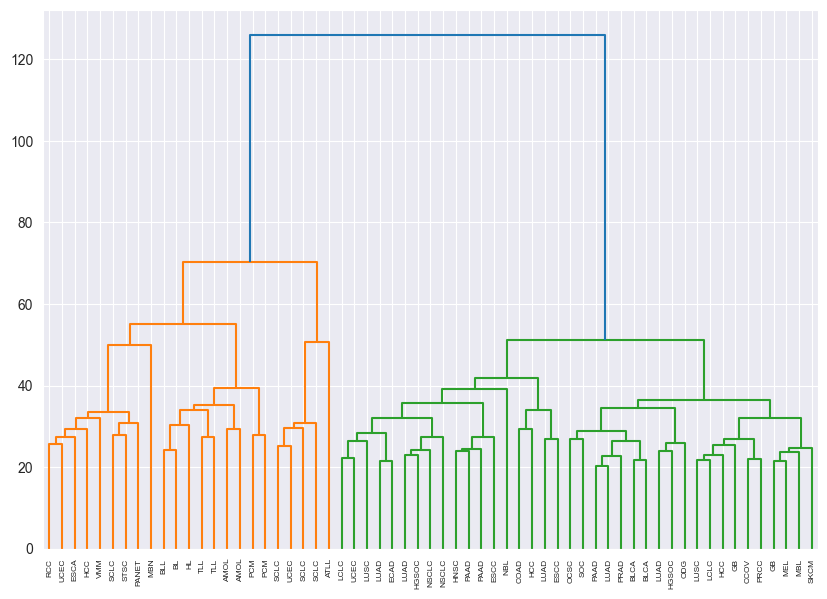

In [9]:
#import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

# 假设我们有一个名为attention_scores的DataFrame，其中包含注意力分数数据
# attention_scores = pd.DataFrame(data)

# 数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
attention_scores_scaled = scaler.fit_transform(attention_scores)

# 计算距离矩阵
distance_matrix = pdist(attention_scores_scaled, metric='euclidean')

# 执行层次聚类average ward
linked = linkage(distance_matrix, method='ward')

# 创建一个树状图
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=attention_scores.index, distance_sort='descending', show_leaf_counts=True)
# 在调用 plt.show() 之前保存图像
plt.savefig('dendrogram.png', dpi=300) 
# 显示树状图
plt.show()

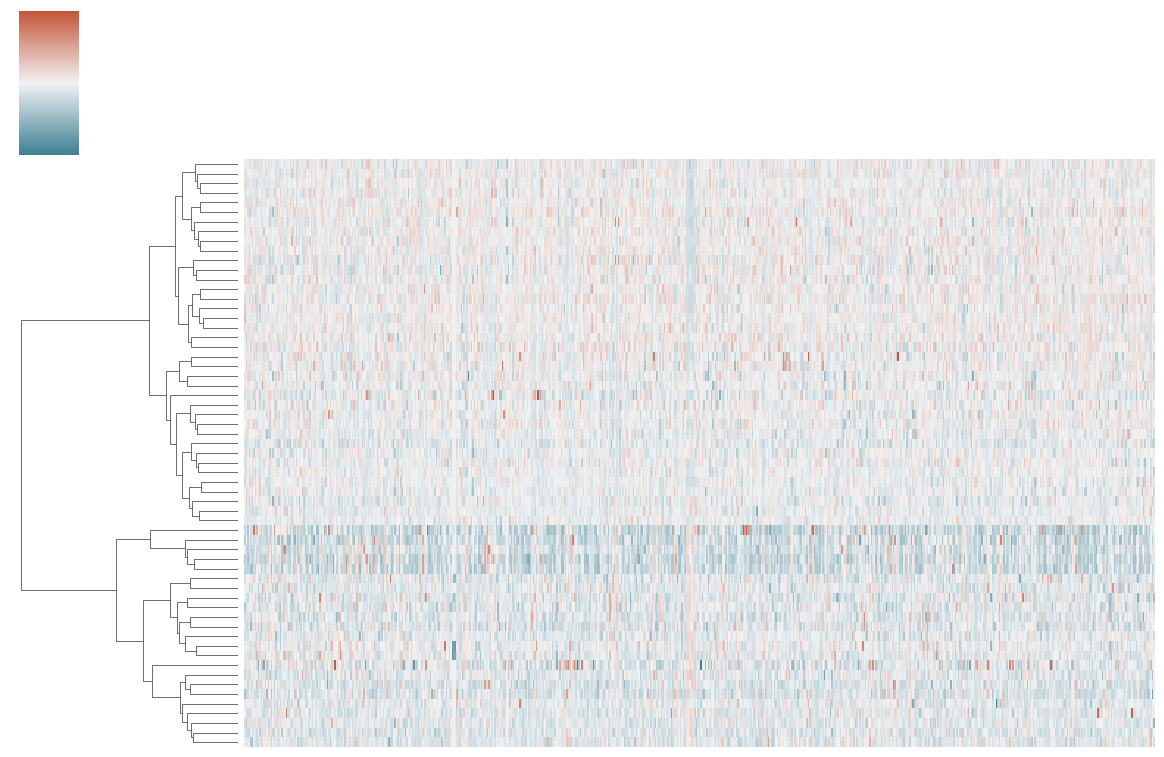

In [10]:

# 选择一个截断点来定义聚类，可以通过观察树状图来选择
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(linked, t=0.9, criterion='distance')

# 将聚类标签添加到原始数据框中
attention_scores['Cluster'] = cluster_labels

cmap = sns.diverging_palette(220, 20, as_cmap=True)
# 可视化聚类结果
sns.clustermap(attention_scores_scaled, method='average', metric='euclidean', cmap=cmap, row_cluster=True, col_cluster=False, row_linkage=linked, figsize=(12, 8))
# 去掉色条
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
# 保存图片
plt.savefig('clustered_attention_scores.png', dpi=300, bbox_inches='tight')
# 保存聚类结果
attention_scores.to_csv('clustered_attention_scores.csv')

In [149]:

# 保存图片
plt.savefig('clustered_attention_scores.png', dpi=300, bbox_inches='tight')
# 保存聚类结果
attention_scores.to_csv('clustered_attention_scores.csv')

<Figure size 640x480 with 0 Axes>

In [3]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_pathway_att_drug = df_pathway_att.groupby('cell_line')['drug'].apply(set).reset_index()
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_pathway_att_drug['drug'])
print(len(drugs))
print(drugs)
# 取df_LUNG中drug中在drugs中的数据
df_pathway_att = df_pathway_att[df_pathway_att['drug'].isin(drugs)]
# 去掉drug = ABT737,AZD5582,Dactinomycin,Docetaxel,GSK1904529A,Navitoclax,Paclitaxel,Sabutoclax,Venetoclax
# df_pathway_att = df_pathway_att[~df_pathway_att['drug'].isin(['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)

144
{'Veliparib', 'PD173074', 'PFI3', 'Lapatinib', 'BMS-345541', 'Paclitaxel', 'Doramapimod', 'Fulvestrant', 'Motesanib', 'PFI-1', 'I-BET-762', 'Luminespib', 'SN-38', '5-Fluorouracil', 'AZD5363', 'Afuresertib', 'EPZ5676', 'Bosutinib', 'JQ1', 'Cyclophosphamide', 'ABT737', 'Axitinib', 'MK-1775', 'Buparlisib', 'P22077', 'Temozolomide', 'Ribociclib', 'Linsitinib', 'Nilotinib', 'Sabutoclax', 'Staurosporine', 'Epirubicin', 'PRIMA-1MET', 'Pictilisib', 'CCT007093', 'Dinaciclib', 'Cediranib', 'Pevonedistat', 'RVX-208', 'WZ4003', 'GDC0810', 'Docetaxel', 'OF-1', 'Mirin', 'AGK2', 'SCH772984', 'I-BRD9', 'OTX015', 'Dasatinib', 'Talazoparib', 'MG-132', 'AZD6738', 'GW441756', 'PLX-4720', 'PD0325901', 'SB216763', 'JNK Inhibitor VIII', 'Alpelisib', 'Nutlin-3a (-)', 'Sepantronium bromide', 'Erlotinib', 'Selumetinib', 'AGI-5198', 'Serdemetan', 'RO-3306', 'NVP-ADW742', 'Navitoclax', 'LY2109761', 'Uprosertib', 'Leflunomide', 'WIKI4', 'Lestaurtinib', 'KU-55933', 'EPZ004777', 'Trametinib', 'GSK2606414', 'YK-4

In [4]:
# 取df_pathway_att前三列数据
df_pathway_att_OncotreeCode = df_pathway_att.iloc[:, :3]
# 去掉第一列数据
# df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop(['drug'], axis=1)
# 去重
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_OncotreeCode.shape)
df_pathway_att_OncotreeCode.head()

(1728, 3)


,drug,cell_line,OncotreeCode
0,5-Fluorouracil,HCC827,LUAD
1,ABT737,HCC827,LUAD
2,AGI-5198,HCC827,LUAD
3,AGI-6780,HCC827,LUAD
4,AGK2,HCC827,LUAD


In [5]:
# 对df_pathway_att从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca = pca.transform(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca.shape

(1728, 2)

In [6]:
# 将降维后的数据转换成dataframe
df_pathway_att_pca = pd.DataFrame(df_pathway_att_pca)
df_pathway_att_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_pca.insert(0, 'cell_line', df_pathway_att['cell_line'])
df_pathway_att_pca.insert(1, 'OncotreeCode', df_pathway_att['OncotreeCode'])
df_pathway_att_pca.insert(2, 'drug', df_pathway_att['drug'])
# 将pca_1>0.002的数据标注出来，方便后面的数据分析
df_pathway_att_pca['pca_1>0.002'] = df_pathway_att_pca['pca_1'].apply(lambda x: 1 if x>0.002 else 0)
print(df_pathway_att_pca.shape)
df_pathway_att_pca.head()

(1728, 6)


,cell_line,OncotreeCode,drug,pca_1,pca_2,pca_1>0.002
0,HCC827,LUAD,5-Fluorouracil,0.001343,0.001182,0
1,HCC827,LUAD,ABT737,0.001049,0.001216,0
2,HCC827,LUAD,AGI-5198,0.004743,-0.000356,1
3,HCC827,LUAD,AGI-6780,0.003701,0.000234,1
4,HCC827,LUAD,AGK2,0.003857,-0.000258,1


In [16]:
# 将df_pathway_att_pca与df_pathway_att_OncotreeCode合并,按照index
# df_pathway_att_pca = pd.concat([df_pathway_att_pca, df_pathway_att_OncotreeCode], axis=1)
# print(df_pathway_att_pca.shape)
# df_pathway_att_pca.head()

In [7]:
# 设置颜色
# ['#984EA3','#FF7F00','#E41A1C','#4DAF4A','#377EB8']
# 设置颜色方案
palette = {'LUAD':'#377EB8', 
           'LCLC':'#FF7F00', 
           # 'NSCLC':'#4DAF4A',
           'LUSC':'#984EA3',
           'SCLC':'#E41A1C'}
# palette = {'LUAD':'#b9f2f0', 
#            'LCLC':'#d0bbff', 
#            'NSCLC':'#ff9f9b',
#            'LUSC':'#a6d854',
#            'SCLC':'#66c2a5'}

In [8]:
# 将df_pathway_att_pca的OncotreeCode列的值替换成颜色
df_pathway_att_pca['OncotreeCode'] = df_pathway_att_pca['OncotreeCode'].map(palette)

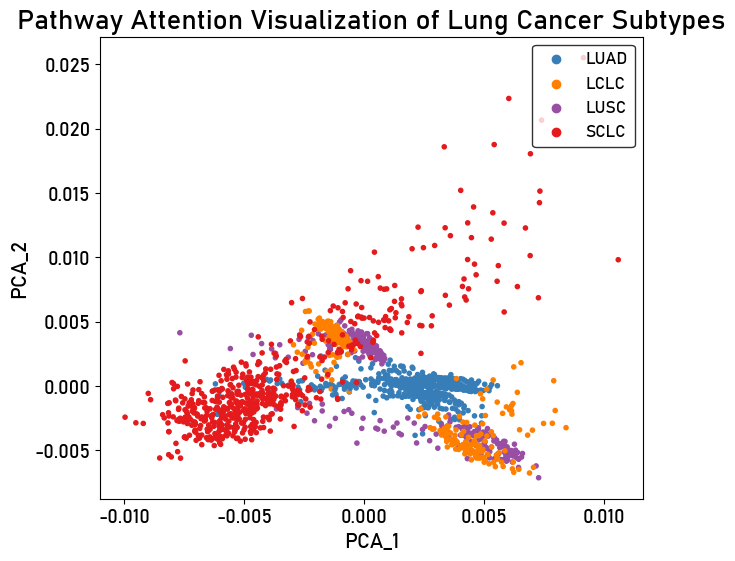

In [9]:
# 画出散点图，按照OncotreeCode进行着色
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6))
plt.scatter(x=df_pathway_att_pca['pca_1'], y=df_pathway_att_pca['pca_2'], c=df_pathway_att_pca['OncotreeCode'], s=9)
# Get the current axes, creating one if necessary.
# ax = plt.gca()
# Set the spines (the box) visibility
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
# ax.spines['left'].set_linewidth(1)  # Y轴线宽
# ax.spines['bottom'].set_linewidth(1)
# 根据palette设置图例
for key, value in palette.items():
    plt.scatter([], [], c=value, label=key)
plt.legend(scatterpoints=1, frameon=True, labelspacing=0.5, loc='upper right', fontsize=12,edgecolor='black')


# title
plt.title('Pathway Attention Visualization of Lung Cancer Subtypes', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig('LUNG_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

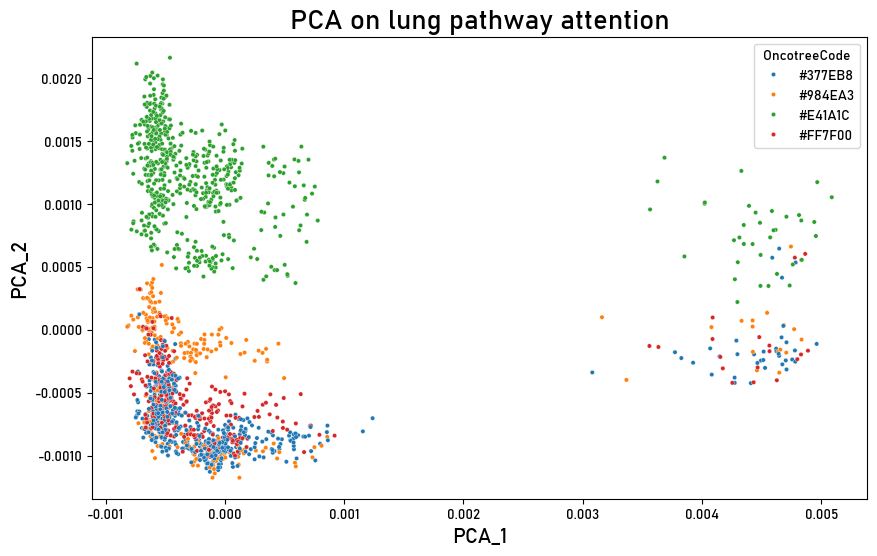

In [20]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='OncotreeCode', data=df_pathway_att_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()